In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.optimize import root_scalar
from util import load_sample,load_acertos, provas, params_inep, irt_params_to_enem_scale,item_info_inep, PL3, find_theta, scalecalparams

%load_ext autoreload
%autoreload 2

# Comparação entre a dificuldade dos itens e as notas dos candidatos
Uma "mapa de Wright" é uma visualização que compara a dificuldade dos itens com as habilidades dos candidatos. Uma vantagem do TRI é que coloca estas duas quantidades na mesma escala. Assim, é possível fazer visualizações como este https://github.com/atp/enem/issues/3#issuecomment-2383941598 

Note que no PISA, TIMMs etc. as dificuldades são distribuídas em torno da média da distribuição de habilidades dos examinandos. Não é assim no ENEM. 

Uma forma de quantificar a dificuldade de um item é o parâmetro `b` do modelo para a probabilidade de acerto $P(\theta)$. Para o modelo 1PL e 2PL isso é o $\theta$ onde a probabilidade de acerto = 0.5. Mas para o modelo 3PL talvez é mais interessante usar outro valor, onde a probabilidade de acerto é 65%, por exemplo ("Response Probability = 65% ou RP65). É isso que o PISA faz (usam 62%, mas 65% é mais visto na literatura, acho).  

In [2]:
# Find where the 3PL logistic funcions = 0.65 (find the root of PL3 - 0.65)
# Well, this was fun. The secret was the "bracket" argument to the root finder function...
# ... it may fail for large b (INEP has a few of those). Let's find out.

def find_theta(a,b,c,prob=0.65):
    
    def fun(x,a,b,c):
        return PL3(x,a,b,c) - prob
    
    res = root_scalar(fun,x0=b,x1=b*1.2,bracket=[-abs(b)*4,abs(b)*4],args=(a,b,c))
    if res.converged:
        return res.root
    else:
        return np.NaN

find_theta(1,1,0.2,0.65)

1.2513144282811837

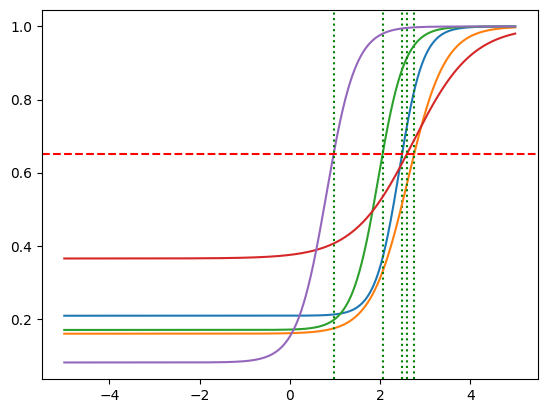

In [3]:
x = np.arange(-5,5,0.01)
items = params_inep(2019,area='MT').sample(5)
for item,params in items.iterrows():
    a,b,c = params['a_inep'],params['b_inep'],params['c_inep']
    ax=sns.lineplot(x=x,y=PL3(x,a,b,c))
    rp65 = find_theta(a,b,c,0.65)
    ax.axvline(rp65,c='g',ls='dotted')
ax.axhline(0.65,c='r',ls='--')

Será que funciona também se colocamos os parâmetros dos itens na escala ENEM? Vamos tentar!

In [4]:
params = params_inep(2019,'MT')
params = irt_params_to_enem_scale(params,'MT')
params

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
117635,238.772021,614.945524,0.35048,1
9779,296.516987,787.456954,0.08500,1
111608,320.718062,709.543129,0.04665,1
111696,266.516521,895.713530,0.11848,1
63187,242.290811,555.675836,0.12552,1
117612,252.122417,861.444879,0.16241,1
63808,375.482299,757.617258,0.08712,1
54448,397.161620,604.618642,0.08034,1
86432,145.557816,548.263560,0.26876,1


/var/dados2/home/ewout/enem_atp/util.py:291: RuntimeWarning: overflow encountered in exp
  return c + (1-c)*1/(1+np.exp(a*(b-theta)))
/var/dados2/home/ewout/enem_atp/util.py:291: RuntimeWarning: overflow encountered in exp
  return c + (1-c)*1/(1+np.exp(a*(b-theta)))
/var/dados2/home/ewout/enem_atp/util.py:291: RuntimeWarning: overflow encountered in exp
  return c + (1-c)*1/(1+np.exp(a*(b-theta)))
/var/dados2/home/ewout/enem_atp/util.py:291: RuntimeWarning: overflow encountered in exp
  return c + (1-c)*1/(1+np.exp(a*(b-theta)))
/var/dados2/home/ewout/enem_atp/util.py:291: RuntimeWarning: overflow encountered in exp
  return c + (1-c)*1/(1+np.exp(a*(b-theta)))
/var/dados2/home/ewout/enem_atp/util.py:291: RuntimeWarning: overflow encountered in exp
  return c + (1-c)*1/(1+np.exp(a*(b-theta)))


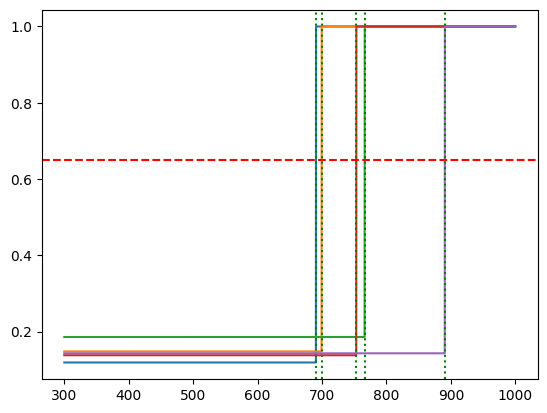

In [5]:
items = params_inep(2019,area='MT').sample(5)
items = irt_params_to_enem_scale(items,'MT')
x = np.arange(300,1000,0.1)
for item,params in items.iterrows():
    a,b,c = params['a_inep'],params['b_inep'],params['c_inep']
    ax=sns.lineplot(x=x,y=PL3(x,a,b,c))
    rp65 = find_theta(a,b,c,0.65)
    ax.axvline(rp65,c='g',ls='dotted')
ax.axhline(0.65,c='r',ls='--')

Ok, não dá certo fazer as contas na escala ENEM. Vamos fazer tudo na escala logit e converter somente na última hora para a escala ENEM

In [6]:
items = params_inep(2019,area='MT')
items['rp65'] = items.apply(lambda x: find_theta(x['a_inep'],x['b_inep'],x['c_inep'],0.65),axis=1)
items

,a_inep,b_inep,c_inep,u,rp65
CO_ITEM,,,,,
63187,1.86876,0.42930,0.12552,1,0.645740
117612,1.94459,2.78766,0.16241,1,2.958154
63808,2.89605,1.98685,0.08712,1,2.150913
54448,3.06326,0.80679,0.08034,1,0.965806
86432,1.12267,0.37213,0.26876,1,0.448284
117798,2.72919,1.92868,0.23186,1,1.993858
30740,1.64938,1.94549,0.20724,1,2.088025
30436,1.64692,0.47926,0.18811,1,0.647692
117725,1.20999,2.11115,0.06509,1,2.535554


# Mapa dos itens
Agora queremos juntar dificuldades das questões com as distribuições de habilidade (notas) na população. Uma inspiração é o chamado "Wright Map" ou mapa itens-pessoa como aqui https://github.com/atp/enem/issues/3 

In [7]:
# carregar uns 1000 ou 10 mil candidatos, para visualizar sua distribuição
amostra = load_sample(2019,1000)
amostra.head(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
31501,190005957808,2019,12,M,1,1,1,1,13,1,...,B,A,A,C,B,A,C,A,B,B
28155,190005463990,2019,5,F,1,3,1,1,1,1,...,A,A,A,B,A,A,A,A,A,A
22400,190003939215,2019,10,F,2,3,1,1,4,1,...,A,A,A,B,A,A,B,A,A,A
25674,190004947811,2019,3,M,1,1,1,1,1,1,...,A,A,A,B,A,A,D,A,A,B
3516,190001459319,2019,11,F,1,3,1,1,1,1,...,B,A,A,B,A,A,B,A,A,B


<Axes: xlabel='NU_NOTA_MT', ylabel='Density'>

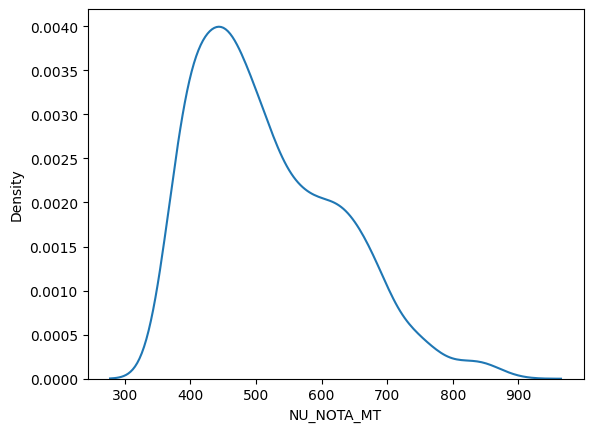

In [8]:
pop = amostra['NU_NOTA_MT']
sns.kdeplot(pop)

In [9]:
slope,intercept = scalecalparams('MT')

In [10]:
items = params_inep(2019,area='MT')
items['rp65'] = items.apply(lambda x: find_theta(x['a_inep'],x['b_inep'],x['c_inep'],0.65),axis=1)
items['rp65'] = items['rp65'].apply(lambda x: x*slope + intercept)
rp65 = items['rp65']
rp65

CO_ITEM
63187      583.737967
117612     883.550034
63808      778.888500
54448      625.235549
86432      558.137189
117798     758.525869
30740      770.734952
30436      583.991036
117725     828.758542
84409      725.722565
28434      910.204137
117607     684.818335
30570      808.643174
84374      787.491396
117635     603.980315
9779       814.606049
111608     738.085667
117726     711.728529
8368       775.821482
13303      755.264813
14324      837.977010
18002      765.928464
42803      703.080997
117743     704.275489
10360      835.455150
31184      908.168773
8401       723.132945
117818     780.316848
117783     784.309807
83792      803.565074
8442       920.503259
111518     685.199306
83994      690.989943
17642      811.889388
117767    2409.279522
83955      728.319036
83754      998.582194
39708      856.561486
117950     821.863608
117845     685.547792
111696     922.065865
89634      772.490426
78445      941.688743
111593     887.293285
Name: rp65, dtype: float

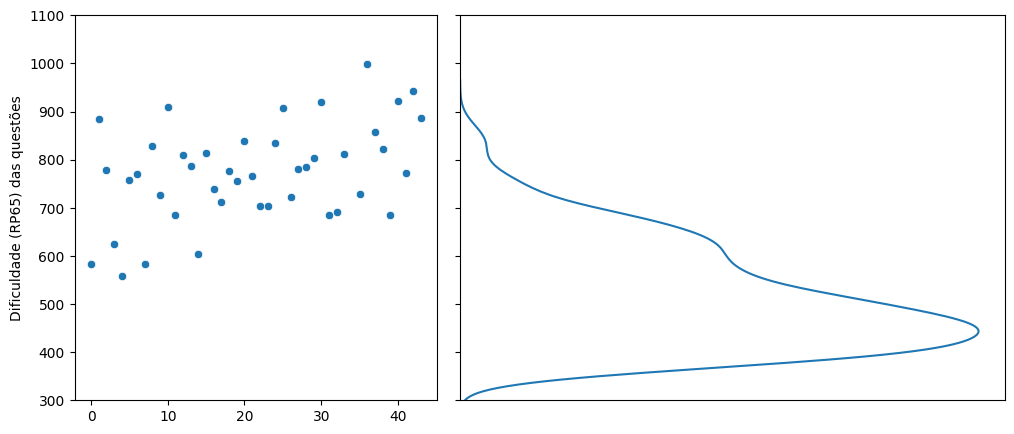

In [11]:
fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True,width_ratios=[2,3])
ax1,ax2 = axs[0],axs[1]
sns.scatterplot(x=range(0,len(rp65)),y=rp65,ax=ax1)
ax1.set_ylabel("Dificuldade (RP65) das questões")
ax1.set_ylim(300,1100)
sns.kdeplot(y=pop,ax = ax2)
ax2.set_xlabel('')
ax2.set_xticks([])
plt.subplots_adjust(wspace=.05)

Agora o que podemos fazer é
1.  Deixar a visualização acima mais bonita
2.  Generalizar para outros anos e areas.

Estou pensando em uma visualização interativa (usando ipywidgets) ou uma visualização de múltiplas pequenas (um gráfico pequeno para cada ano, por exemplo). 